In [61]:
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import requests
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# from webdriver_manager.chrome import ChromeDriverManager
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)
nyc_soup = BeautifulSoup(requests.get("https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page").text, "html.parser")

In [3]:
url_list = []

for tr in list(nyc_soup.find_all("tr"))[23:]: 
    try:
        url_list.append(f"https://www1.nyc.gov{tr.find_all('a')[1]['href']}")
    except:
        pass

url_list







['https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_manhattan.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_bronx.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_brooklyn.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_queens.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_staten_island.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_manhattan.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_bronx.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_brooklyn.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_queens.xlsx',
 'https://www1.nyc.gov

In [4]:
list_df = []
for url in url_list:
    try:
        list_df.append(pd.read_excel(url))
    except:
        print(url)


list_df[1]


,BRONX ANNUAL SALES FOR CALENDAR YEAR 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,All Sales From January 2020- December 2020. Pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"For sales prior to the Final, Neighborhood Nam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sales after the Final Roll, Neighborhood Name ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6647,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,NaN,D4,"4315 WEBSTER AVENUE, 4L",NaN,...,NaN,NaN,NaN,NaN,NaN,1958,2,D4,181750,2020-03-05 00:00:00
6648,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,NaN,D4,"4295 WEBSTER AVENUE, 4F",NaN,...,NaN,NaN,NaN,NaN,NaN,1957,2,D4,230000,2020-02-24 00:00:00
6649,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,NaN,D4,"4295 WEBSTER AVENUE, 5H",NaN,...,NaN,NaN,NaN,NaN,NaN,1957,2,D4,305803,2020-12-18 00:00:00
6650,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,NaN,D4,"4295 WEBSTER AVENUE, 6L",NaN,...,NaN,NaN,NaN,NaN,NaN,1957,2,D4,178000,2020-11-05 00:00:00


In [5]:
list_df_2020_2018 = list_df[0:10]
list_df_2020_2018[0][7:]

,MANHATTAN ANNUAL SALES FOR CALENDAR YEAR 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
7,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,72,NaN,B9,231 EAST 7TH,NaN,...,2,0,2,1718,5154,1901,1,B9,0,2020-10-02 00:00:00
8,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,0,2020-10-31 00:00:00
9,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,4350000,2020-07-16 00:00:00
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372,10,NaN,C7,274 EAST 3RD,NaN,...,9,1,10,2021,6445,1900,2,C7,0,2020-12-27 00:00:00
11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374,1,NaN,C7,301-303 EAST 4TH STREET,NaN,...,8,2,10,1501,6929,1900,2,C7,3672530,2020-11-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12882,1,WASHINGTON HEIGHTS UPPER,33 EDUCATIONAL FACILITIES,4,2180,35,NaN,W3,554 FT WASHINGTON AVENUE,NaN,...,0,2,2,19300,14040,1930,4,W3,12000000,2020-10-22 00:00:00
12883,1,WASHINGTON HEIGHTS UPPER,37 RELIGIOUS FACILITIES,4,2170,118,NaN,M1,37-41 HILLSIDE AVENUE,NaN,...,0,1,1,20375,5200,1959,4,M1,8000000,2020-08-20 00:00:00
12884,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177,1101,NaN,RB,"40 PINEHURST AVENUE, CFA",CFA,...,0,1,1,0,0,2016,4,RB,0,2020-04-29 00:00:00
12885,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177,1102,NaN,RB,"40 PINEHURST AVENUE, CFB",CFB,...,0,1,1,0,0,2016,4,RB,0,2020-04-29 00:00:00


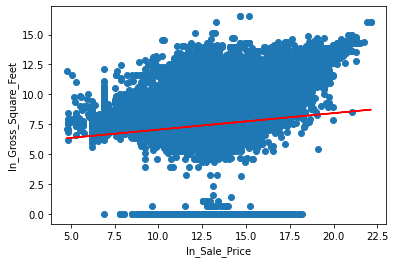

coef is : 0.137724753666795


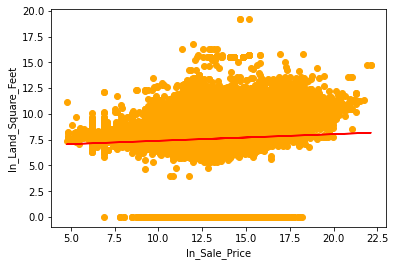

coef is : 0.06425572767912341


In [125]:
# data sets change format at 2018 - 2020



# bronx_2018_df = list_df[16]

# header = bronx_2018_df.iloc[3]
# new_df = bronx_2018_df[3:]
# new_df.columns = header

list_df_b4_2018 = list_df[11:][4:]



# for i in list_df:
    
#     list_df[count].columns = ['BOROUGH', 'NEIGHBORHOOD',	'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE']

df_list = []

for current in list_df_b4_2018:
    header = current.iloc[3]
    new_df = current[4:]
    new_df.columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE']
    df_list.append(new_df)

df_list_20_19 = []
for i in list_df_2020_2018:
    header = i.iloc[6]
    new_df_20_19 = i[7:]
    new_df_20_19.columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE']
    df_list_20_19.append(new_df_20_19)

# df_list[['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'TAX_CLASS_AT_TIME_OF_SALE', 'BLOCK', 'LOT', 'ADDRESS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'SALE_PRICE']]
#get name of each element in hear row append to list and set list as the header.

big_df = df_list_20_19 + df_list
no_outlier = []

big_df[75]



massive_df = pd.concat(big_df)

massive_df['YEAR'] = pd.DatetimeIndex(massive_df['SALE_DATE']).year
# massive_df['SALE_DATE'] = massive_df['SALE_DATE'] != 0
# massive_df['SALE_PRICE'] = massive_df['SALE_PRICE'] != 0

massive_df= massive_df[massive_df['SALE_PRICE'] > 100]
massive_df= massive_df[massive_df['GROSS_SQUARE_FEET'] != 0]
massive_df= massive_df[massive_df['LAND_SQUARE_FEET'] != 0]
massive_df['SALE_PRICE'] = massive_df['SALE_PRICE'].astype(float)
massive_df['GROSS_SQUARE_FEET'] = massive_df['GROSS_SQUARE_FEET'].astype(float)
massive_df['LAND_SQUARE_FEET'] = massive_df['LAND_SQUARE_FEET'].astype(float)


massive_df['ln_SALE_PRICE'] = np.log(massive_df['SALE_PRICE'])
massive_df['ln_GROSS_SQUARE_FEET'] = np.log(massive_df['GROSS_SQUARE_FEET'])
massive_df['ln_LAND_SQUARE_FEET'] = np.log(massive_df['LAND_SQUARE_FEET'])

massive_df['ln_SALE_PRICE'] = np.nan_to_num(massive_df['ln_SALE_PRICE'])
massive_df['ln_GROSS_SQUARE_FEET'] = np.nan_to_num(massive_df['ln_GROSS_SQUARE_FEET'])
massive_df['ln_LAND_SQUARE_FEET'] = np.nan_to_num(massive_df['ln_LAND_SQUARE_FEET'])

small_df = massive_df[['ln_SALE_PRICE', 'ln_GROSS_SQUARE_FEET', 'ln_LAND_SQUARE_FEET']]

small_df = small_df[~np.all(small_df == 0, axis=1)]



x = small_df['ln_SALE_PRICE']
Y = small_df['ln_GROSS_SQUARE_FEET']
Y2 = small_df['ln_LAND_SQUARE_FEET']




plt.scatter(massive_df['ln_SALE_PRICE'], massive_df['ln_GROSS_SQUARE_FEET'])
m, b = np.polyfit(x, Y, 1)
plt.plot(x, m*x+b, color= 'red')
plt.xlabel('ln_Sale_Price')
plt.ylabel('ln_Gross_Square_Feet')
plt.show()
print(f'coef is : {m}')

plt.scatter(massive_df['ln_SALE_PRICE'], massive_df['ln_LAND_SQUARE_FEET'], color= 'orange')
m2, b2 = np.polyfit(x, Y2, 1)
plt.plot(x, m2*x+b2, color= 'red')
plt.xlabel('ln_Sale_Price')
plt.ylabel('ln_Land_Square_Feet')
plt.show()
print(f'coef is : {m2}')


# for s in big_df: 
#     try:
#         s['year'] = pd.DatetimeIndex(s['SALE_DATE']).year
#         Big_df = big_df[s][big_df[s]['SALE_DATE'] != 0
#         Big_df = np.math.log*(Big_df[s]['SALE PRICE'])
#     except:
#         print(s)
        

In [126]:
X = massive_df[['ln_LAND_SQUARE_FEET', 'ln_GROSS_SQUARE_FEET']]
y = massive_df['ln_SALE_PRICE']

from sklearn import linear_model

X.dropna(inplace=True)

X = np.nan_to_num(X)


regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)

[-0.10995033  0.13907221]


<ipython-input-126-a7c071a3566f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
